In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import geopandas as gpd
import folium as fl
from folium.plugins import HeatMap, HeatMapWithTime
import matplotlib.pyplot as plt
import seaborn as sns
import os
from warnings import filterwarnings

filterwarnings('ignore')

In [3]:
# First we'll retrieve all the relevant csv files from the directory.
# Than we'll create a list of dataframes (one for each file) and concatenate
# them together in order to work on all the data at once.

data_files = os.listdir('csse_covid_19_data/csse_covid_19_daily_reports')
data_files = pd.Series(data_files, name='Data')
data_files = data_files[data_files.str.contains('.csv')]
data_files = data_files.sort_values()
data_files.head()

35    01-22-2020.csv
36    01-23-2020.csv
50    01-24-2020.csv
49    01-25-2020.csv
25    01-26-2020.csv
Name: Data, dtype: object

In [4]:
df_all = [pd.read_csv(f'csse_covid_19_data/csse_covid_19_daily_reports/{csv_file}') for csv_file in data_files]
len(df_all)

58

In [5]:
df = pd.concat(df_all)
df.reset_index(drop=True, inplace=True)
df

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
7009,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0,49.1900,-2.110
7010,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0,18.2000,-66.500
7011,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0,-1.4400,15.556
7012,NaN,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0,24.2500,-76.000


In [6]:
df['Last Update'] = pd.to_datetime(df['Last Update'])

df['Date Last Updated'] = df['Last Update'].dt.date
df['Time Last Updated'] = df['Last Update'].dt.time

df = df[['Province/State', 'Country/Region', 'Date Last Updated', 'Time Last Updated' ,'Confirmed', 'Deaths', 'Recovered', 'Latitude', 'Longitude']]
df

,Province/State,Country/Region,Date Last Updated,Time Last Updated,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Anhui,Mainland China,2020-01-22,17:00:00,1.0,NaN,NaN,NaN,NaN
1,Beijing,Mainland China,2020-01-22,17:00:00,14.0,NaN,NaN,NaN,NaN
2,Chongqing,Mainland China,2020-01-22,17:00:00,6.0,NaN,NaN,NaN,NaN
3,Fujian,Mainland China,2020-01-22,17:00:00,1.0,NaN,NaN,NaN,NaN
4,Gansu,Mainland China,2020-01-22,17:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7009,NaN,Jersey,2020-03-17,18:33:03,0.0,0.0,0.0,49.1900,-2.110
7010,NaN,Puerto Rico,2020-03-17,16:13:14,0.0,0.0,0.0,18.2000,-66.500
7011,NaN,Republic of the Congo,2020-03-17,21:33:03,0.0,0.0,0.0,-1.4400,15.556
7012,NaN,The Bahamas,2020-03-19,12:13:38,0.0,0.0,0.0,24.2500,-76.000


In [7]:
df.isnull().sum()

Province/State       2925
Country/Region          0
Date Last Updated       0
Time Last Updated       0
Confirmed              19
Deaths                441
Recovered             388
Latitude             2818
Longitude            2818
dtype: int64

In [8]:
world_wide = df.groupby('Date Last Updated').sum().copy()
world_wide.drop(columns=['Latitude', 'Longitude'], inplace=True)
# world_wide.reset_index(inplace=True)
world_wide.head()

,Confirmed,Deaths,Recovered
Date Last Updated,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


In [9]:
world_wide.isnull().sum()

Confirmed    0
Deaths       0
Recovered    0
dtype: int64

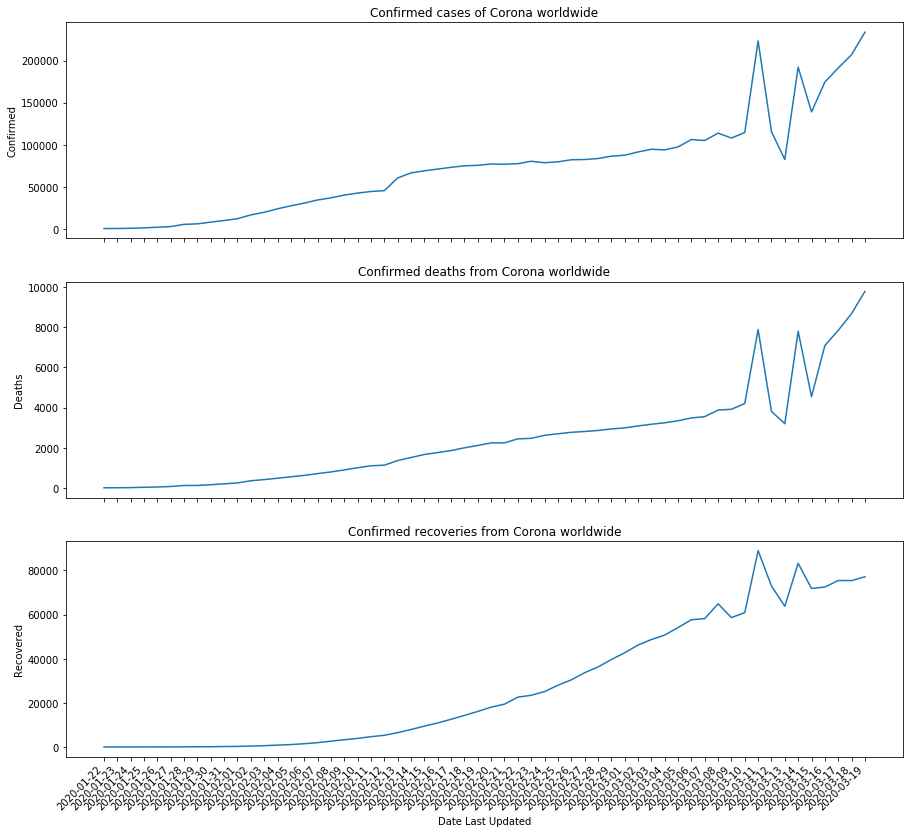

In [10]:
fig, axes = plt.subplots(3,1, figsize=(15,15))
fig.autofmt_xdate(rotation=45)

sns.lineplot(x=world_wide.index, y='Confirmed', data=world_wide, ax=axes[0])
axes[0].xaxis.set_ticks(world_wide.index)
axes[0].set_title('Confirmed cases of Corona worldwide')

sns.lineplot(x=world_wide.index, y='Deaths', data=world_wide, ax=axes[1])
axes[1].xaxis.set_ticks(world_wide.index)
axes[1].set_title('Confirmed deaths from Corona worldwide')

sns.lineplot(x=world_wide.index, y='Recovered', data=world_wide, ax=axes[2])
axes[2].xaxis.set_ticks(world_wide.index);
axes[2].set_title('Confirmed recoveries from Corona worldwide');

## Track the growth by country

In [11]:
country_counts = df['Country/Region'].value_counts().to_dict()

for country in sorted(country_counts.keys()):
    print(country, country_counts[country])

 Azerbaijan 1
Afghanistan 25
Albania 11
Algeria 24
Andorra 18
Antigua and Barbuda 7
Argentina 17
Armenia 19
Aruba 7
Australia 296
Austria 24
Azerbaijan 19
Bahamas, The 1
Bahrain 25
Bangladesh 12
Barbados 3
Belarus 21
Belgium 45
Benin 4
Bhutan 14
Bolivia 9
Bosnia and Herzegovina 15
Brazil 24
Brunei 11
Bulgaria 12
Burkina Faso 10
Cambodia 53
Cameroon 14
Canada 219
Cayman Islands 3
Central African Republic 5
Chad 1
Channel Islands 1
Chile 17
China 297
Colombia 15
Congo (Brazzaville) 5
Congo (Kinshasa) 9
Costa Rica 14
Cote d'Ivoire 9
Croatia 24
Cruise Ship 9
Cuba 8
Curacao 2
Cyprus 11
Czech Republic 10
Czechia 9
Denmark 32
Djibouti 2
Dominican Republic 19
Ecuador 19
Egypt 35
El Salvador 1
Equatorial Guinea 5
Estonia 22
Eswatini 6
Ethiopia 7
Faroe Islands 7
Fiji 1
Finland 51
France 100
French Guiana 12
Gabon 6
Gambia, The 2
Georgia 23
Germany 52
Ghana 6
Gibraltar 7
Greece 23
Greenland 4
Guadeloupe 7
Guam 4
Guatemala 6
Guernsey 6
Guinea 7
Guyana 8
Holy See 10
Honduras 9
Hong Kong 48
Hong Kon

In [12]:
US = df[df['Country/Region']  == 'US']
US

,Province/State,Country/Region,Date Last Updated,Time Last Updated,Confirmed,Deaths,Recovered,Latitude,Longitude
31,Washington,US,2020-01-22,17:00:00,1.0,NaN,NaN,NaN,NaN
69,Washington,US,2020-01-23,17:00:00,1.0,NaN,NaN,NaN,NaN
117,Washington,US,2020-01-24,17:00:00,1.0,NaN,NaN,NaN,NaN
118,Chicago,US,2020-01-24,17:00:00,1.0,NaN,NaN,NaN,NaN
158,Washington,US,2020-01-25,17:00:00,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6949,Puerto Rico,US,2020-03-16,00:22:11,5.0,0.0,0.0,18.2208,-66.5901
6963,Virgin Islands,US,2020-03-19,16:13:38,3.0,0.0,0.0,18.3358,-64.8963
6975,United States Virgin Islands,US,2020-03-18,00:13:13,2.0,0.0,0.0,18.3500,-64.9330
6976,West Virginia,US,2020-03-19,02:33:09,2.0,0.0,0.0,38.4912,-80.9545


In [13]:
US = gpd.GeoDataFrame(US, geometry=gpd.points_from_xy(US['Longitude'], US['Latitude']))
US.crs = {'init' :'epsg:4326'}
US

,Province/State,Country/Region,Date Last Updated,Time Last Updated,Confirmed,Deaths,Recovered,Latitude,Longitude,geometry
31,Washington,US,2020-01-22,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
69,Washington,US,2020-01-23,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
117,Washington,US,2020-01-24,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
118,Chicago,US,2020-01-24,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
158,Washington,US,2020-01-25,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
...,...,...,...,...,...,...,...,...,...,...
6949,Puerto Rico,US,2020-03-16,00:22:11,5.0,0.0,0.0,18.2208,-66.5901,POINT (-66.590 18.221)
6963,Virgin Islands,US,2020-03-19,16:13:38,3.0,0.0,0.0,18.3358,-64.8963,POINT (-64.896 18.336)
6975,United States Virgin Islands,US,2020-03-18,00:13:13,2.0,0.0,0.0,18.3500,-64.9330,POINT (-64.933 18.350)
6976,West Virginia,US,2020-03-19,02:33:09,2.0,0.0,0.0,38.4912,-80.9545,POINT (-80.954 38.491)


In [14]:
US = US[~US['Province/State'].isin(['Puerto Rico', 'Virgin Islands, U.S.'])]
US

,Province/State,Country/Region,Date Last Updated,Time Last Updated,Confirmed,Deaths,Recovered,Latitude,Longitude,geometry
31,Washington,US,2020-01-22,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
69,Washington,US,2020-01-23,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
117,Washington,US,2020-01-24,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
118,Chicago,US,2020-01-24,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
158,Washington,US,2020-01-25,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
...,...,...,...,...,...,...,...,...,...,...
6936,Alaska,US,2020-03-19,02:33:09,9.0,0.0,0.0,61.3707,-152.4044,POINT (-152.404 61.371)
6963,Virgin Islands,US,2020-03-19,16:13:38,3.0,0.0,0.0,18.3358,-64.8963,POINT (-64.896 18.336)
6975,United States Virgin Islands,US,2020-03-18,00:13:13,2.0,0.0,0.0,18.3500,-64.9330,POINT (-64.933 18.350)
6976,West Virginia,US,2020-03-19,02:33:09,2.0,0.0,0.0,38.4912,-80.9545,POINT (-80.954 38.491)


In [15]:
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
us_states = gpd.read_file('US_map.json')
us_states.tail()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
47,0400000US53,53,Washington,,66455.521,"MULTIPOLYGON (((-122.51954 48.28831, -122.5227..."
48,0400000US54,54,West Virginia,,24038.210,"POLYGON ((-80.07595 39.72135, -79.91617 39.720..."
49,0400000US55,55,Wisconsin,,54157.805,"MULTIPOLYGON (((-90.40331 47.02669, -90.40332 ..."
50,0400000US56,56,Wyoming,,97093.141,"POLYGON ((-110.04848 40.99755, -110.12164 40.9..."
51,0400000US72,72,Puerto Rico,,3423.775,"MULTIPOLYGON (((-65.32770 18.29584, -65.33745 ..."


In [16]:
us_states = us_states[us_states['NAME'].isin(['Puerto Rico']) == False]
us_states.tail()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
46,0400000US51,51,Virginia,,39490.086,"MULTIPOLYGON (((-75.97361 37.83582, -75.97171 ..."
47,0400000US53,53,Washington,,66455.521,"MULTIPOLYGON (((-122.51954 48.28831, -122.5227..."
48,0400000US54,54,West Virginia,,24038.210,"POLYGON ((-80.07595 39.72135, -79.91617 39.720..."
49,0400000US55,55,Wisconsin,,54157.805,"MULTIPOLYGON (((-90.40331 47.02669, -90.40332 ..."
50,0400000US56,56,Wyoming,,97093.141,"POLYGON ((-110.04848 40.99755, -110.12164 40.9..."


In [17]:
us_states.NAME

0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
9                  Florida
10                 Georgia
11                  Hawaii
12                   Idaho
13                Illinois
14                 Indiana
15                    Iowa
16                  Kansas
17                Kentucky
18               Louisiana
19                   Maine
20                Maryland
21           Massachusetts
22                Michigan
23               Minnesota
24             Mississippi
25                Missouri
26                 Montana
27                Nebraska
28                  Nevada
29           New Hampshire
30              New Jersey
31              New Mexico
32                New York
33          North Carolina
34            North Dakota
35                    Ohio
36                Oklahoma
3

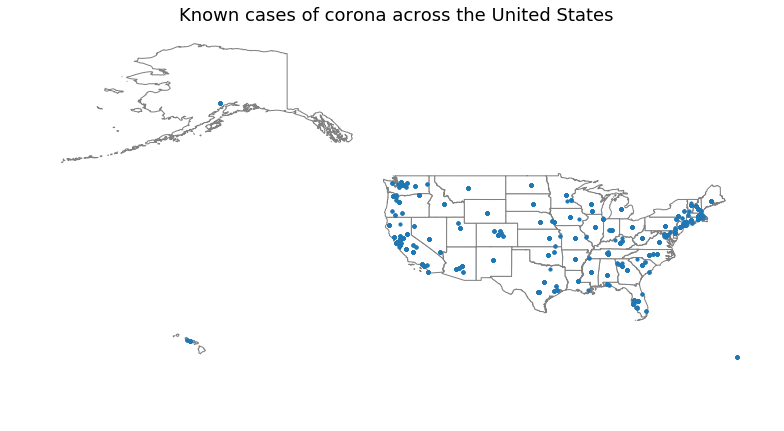

In [18]:
ax = us_states.plot(figsize=(20,7), color='white', edgecolor='gray')
ax.set_xlim([-185, -60])
ax.set_title('Known cases of corona across the United States', fontsize=18)
ax.set_axis_off()
US.plot(ax=ax, markersize=10)
plt.show()

In [19]:
# Use this function to make sure every web-browser 
# can display the map
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')

In [20]:
m = fl.Map((50, -95.7129), zoom_start=3)
HeatMap(US.dropna()[['Latitude', 'Longitude']], radius=15).add_to(m)

print('\t\t\t\t   Heatmap of cases of cornona across the US')
embed_map(m, 'heatmap_us.html')

				   Heatmap of cases of cornona across the US


In [21]:
US = US.groupby('Province/State')

us_groups = pd.Series(sorted(US.groups.keys()), name='US groups')
us_groups.head()

0     Norfolk County, MA
1                Alabama
2     Alameda County, CA
3                 Alaska
4                Arizona
Name: US groups, dtype: object

In [22]:
# We now can look at all the dataframes pertaining to California
california_groups = us_groups[us_groups.str.contains('(CA|California)')]
california_groups

2                      Alameda County, CA
9                            Berkeley, CA
13                             California
27                Contra Costa County, CA
46                      Fresno County, CA
62                    Humboldt County, CA
82                        Los Angeles, CA
84                      Madera County, CA
119                     Orange County, CA
120                            Orange, CA
125                     Placer County, CA
134                  Riverside County, CA
137                 Sacramento County, CA
139                        San Benito, CA
140                  San Diego County, CA
141              San Francisco County, CA
142                         San Mateo, CA
143                Santa Clara County, CA
144                       Santa Clara, CA
145                 Santa Cruz County, CA
150                     Shasta County, CA
153                     Sonoma County, CA
165                            Travis, CA
166    Travis, CA (From Diamond Pr

In [23]:
california = [US.get_group(group) for group in california_groups]
california = pd.concat(california)
california

,Province/State,Country/Region,Date Last Updated,Time Last Updated,Confirmed,Deaths,Recovered,Latitude,Longitude,geometry
3904,"Alameda County, CA",US,2020-03-07,13:13:14,2.0,0.0,0.0,37.6017,-121.7195,POINT (-121.71950 37.60170)
4149,"Alameda County, CA",US,2020-03-07,13:13:14,2.0,0.0,0.0,37.6017,-121.7195,POINT (-121.71950 37.60170)
4413,"Alameda County, CA",US,2020-03-07,13:13:14,2.0,0.0,0.0,37.6017,-121.7195,POINT (-121.71950 37.60170)
3214,"Berkeley, CA",US,2020-03-03,23:53:03,1.0,0.0,0.0,37.8715,-122.2730,POINT (-122.27300 37.87150)
3377,"Berkeley, CA",US,2020-03-03,23:53:03,1.0,0.0,0.0,37.8715,-122.2730,POINT (-122.27300 37.87150)
...,...,...,...,...,...,...,...,...,...,...
4512,"Travis, CA (From Diamond Princess)",US,2020-02-24,23:33:02,0.0,0.0,0.0,38.2721,-121.9399,POINT (-121.93990 38.27210)
3759,"Yolo County, CA",US,2020-03-06,20:13:14,1.0,0.0,0.0,38.7646,-121.9018,POINT (-121.90180 38.76460)
3983,"Yolo County, CA",US,2020-03-06,20:13:14,1.0,0.0,0.0,38.7646,-121.9018,POINT (-121.90180 38.76460)
4238,"Yolo County, CA",US,2020-03-06,20:13:14,1.0,0.0,0.0,38.7646,-121.9018,POINT (-121.90180 38.76460)


In [24]:
cal = gpd.read_file('CA_Counties/CA_Counties_TIGER2016.shp')
cal.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

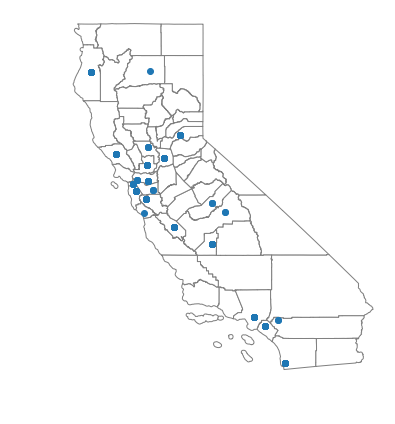

In [25]:
ax = cal.plot(figsize=(20,7), color='white', edgecolor='gray')
ax.set_axis_off()
california.to_crs(epsg=3857).plot(ax=ax)